In [1]:
!pip install geopandas

In [2]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import plotly.express as px

In [3]:
df_euro_data = pd.read_csv("https://raw.githubusercontent.com/SDuncan5/Eurostat-Data/main/trade_eurostat_no_nans.csv")
df_euro_data = df_euro_data.drop(columns=["Unnamed: 0"])
df_euro_data

,geo,TIME_PERIOD,CPI,Immigrants,Population,Housing Index,GDP,emigration,unemployment,total_deaths,Exports,Imports
0,Austria,2011,93.35,82230.0,8391643.0,81.60,310128.7,51197.0,3.3,76479.0,127462.4,137512.5
1,Austria,2012,95.75,91557.0,8429991.0,87.57,318653.0,51812.0,3.5,79436.0,129678.5,138942.4
2,Austria,2013,97.77,101866.0,8479823.0,92.10,323910.2,54071.0,3.8,79526.0,131884.6,137999.8
3,Austria,2014,99.20,116262.0,8546356.0,95.33,333146.1,53491.0,4.0,78252.0,134172.5,137001.2
4,Austria,2015,100.00,166323.0,8642699.0,100.00,344269.2,56689.0,4.1,83073.0,137756.8,140699.2
...,...,...,...,...,...,...,...,...,...,...,...,...
280,Slovakia,2017,100.90,7188.0,5439232.0,112.99,84669.9,3466.0,5.4,53914.0,73790.1,72191.9
281,Slovakia,2018,103.46,7253.0,5446771.0,121.32,89874.7,3298.0,4.3,54293.0,79136.9,78727.4
282,Slovakia,2019,106.33,7016.0,5454147.0,132.39,94429.7,3384.0,3.8,53234.0,79962.0,80407.4
283,Slovakia,2020,108.47,6775.0,5458827.0,145.06,93444.1,2428.0,4.4,59089.0,75586.2,73700.2


In [4]:
df_euro_data["geo"].value_counts().index

Index(['Austria', 'Belgium', 'Slovenia', 'Sweden', 'Romania', 'Portugal',
       'Poland', 'Netherlands', 'Malta', 'Latvia', 'Luxembourg', 'Lithuania',
       'Italy', 'Ireland', 'Hungary', 'Croatia', 'France', 'Finland', 'Spain',
       'Estonia', 'Denmark', 'Germany', 'Czechia', 'Cyprus', 'Slovakia',
       'Bulgaria'],
      dtype='object')

# Map Visualization

In [5]:
gpd.datasets.get_path("naturalearth_lowres")
!ls /usr/local/lib/python3.9/dist-packages/geopandas/datasets/naturalearth_lowres/

ls: cannot access '/usr/local/lib/python3.9/dist-packages/geopandas/datasets/naturalearth_lowres/': No such file or directory


<ipython-input-5-b427af84020d>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres")


In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world;

<ipython-input-6-4e58690a1ffb>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [7]:
europe = world[world["continent"] == "Europe"]
europe

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
18,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ..."
21,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
110,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
111,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
112,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.15944 52.06125, 32.41206 52.28869..."
113,37970874.0,Europe,Poland,POL,595858,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
114,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
115,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
116,2657637.0,Europe,Moldova,MDA,11968,"POLYGON ((26.61934 48.22073, 26.85782 48.36821..."


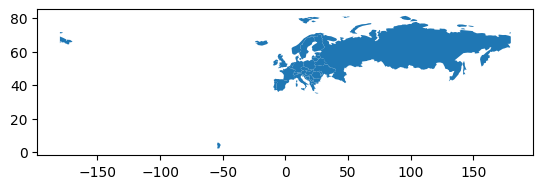

In [8]:
europe.plot();

In [9]:
df_euro_2021 = europe.merge(df_euro_data[df_euro_data["TIME_PERIOD"] == 2021],
                       how="inner",
                       left_on="name",
                       right_on="geo")
df_euro_2021

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,geo,TIME_PERIOD,CPI,Immigrants,Population,Housing Index,GDP,emigration,unemployment,total_deaths,Exports,Imports
0,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",France,2021,107.68,336398.0,67764304.0,123.98,2502118.0,177028.0,4.9,661779.0,494948.8,605254.5
1,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",Sweden,2021,110.49,90631.0,10415811.0,134.46,540734.0,48284.0,6.5,91958.0,160337.1,158369.1
2,37970874.0,Europe,Poland,POL,595858,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",Poland,2021,114.30,241116.0,37747124.0,147.77,576382.6,201595.0,2.1,519517.0,288180.6,289660.3
3,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Austria,2021,111.46,118511.0,8955797.0,153.26,405241.4,67299.0,4.2,91962.0,171541.2,185732.3
4,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.08561 48.42226, 22.64082 48.15024...",Hungary,2021,119.04,80471.0,9709891.0,208.04,153963.3,67999.0,2.7,156131.0,119912.1,120925.5
5,19356544.0,Europe,Romania,ROU,250077,"POLYGON ((28.23355 45.48828, 28.67978 45.30403...",Romania,2021,115.21,194642.0,19122059.0,134.09,241611.3,216861.0,3.2,335527.0,73923.0,98334.9
6,2786844.0,Europe,Lithuania,LTU,54627,"POLYGON ((26.49433 55.61511, 26.58828 55.16718...",Lithuania,2021,115.75,44858.0,2800839.0,163.84,56478.1,25205.0,5.0,47746.0,34474.9,37690.7
7,1912789.0,Europe,Latvia,LVA,34102,"POLYGON ((27.28818 57.47453, 27.77002 57.24426...",Latvia,2021,112.14,12689.0,1884490.0,161.65,33348.9,12975.0,5.1,34600.0,17650.5,20694.8
8,1326590.0,Europe,Estonia,EST,31471,"POLYGON ((27.98113 59.47537, 27.98112 59.47537...",Estonia,2021,114.72,19524.0,1330932.0,152.78,31169.0,12481.0,4.4,18587.0,18253.0,19989.9
9,83132799.0,Europe,Germany,DEU,3861123,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",Germany,2021,109.20,874367.0,83196078.0,154.70,3617450.0,543162.0,2.5,1023687.0,1384144.5,1202926.5


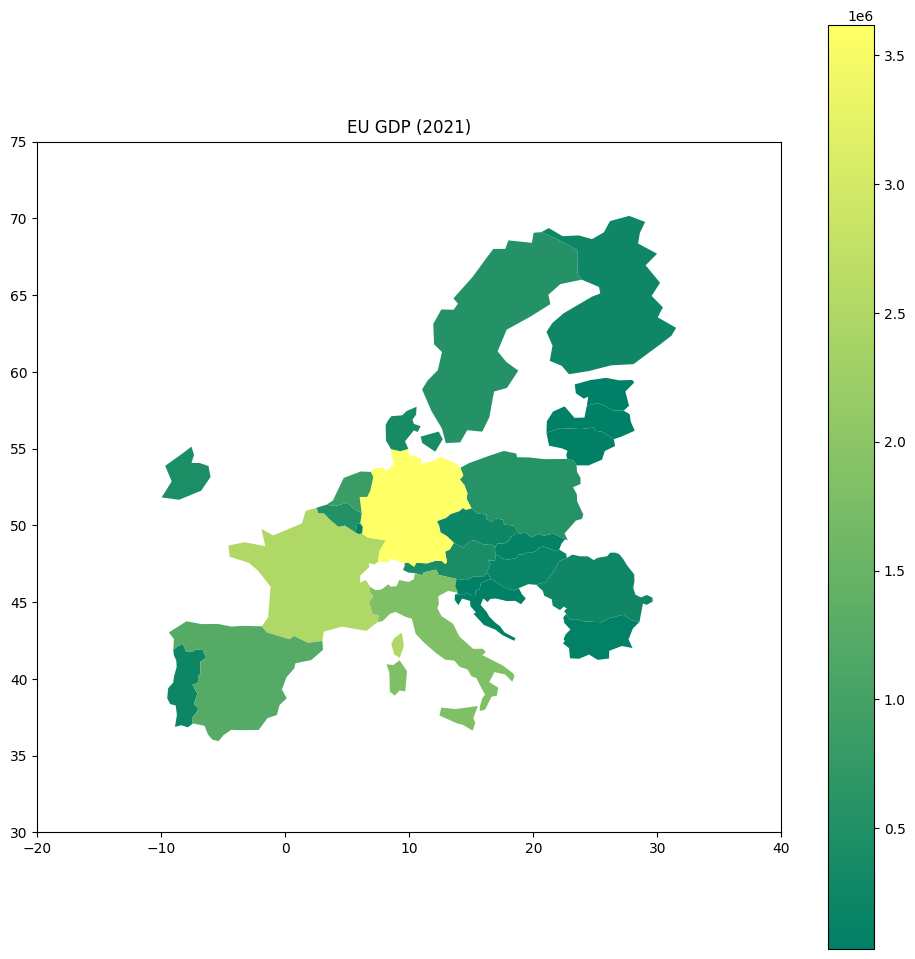

In [10]:
df_euro_2021.plot(column = "GDP", cmap = "summer", legend=True, figsize=(12, 12));
plt.xlim(-20, 40);
plt.ylim(30, 75);
plt.title("EU GDP (2021)");

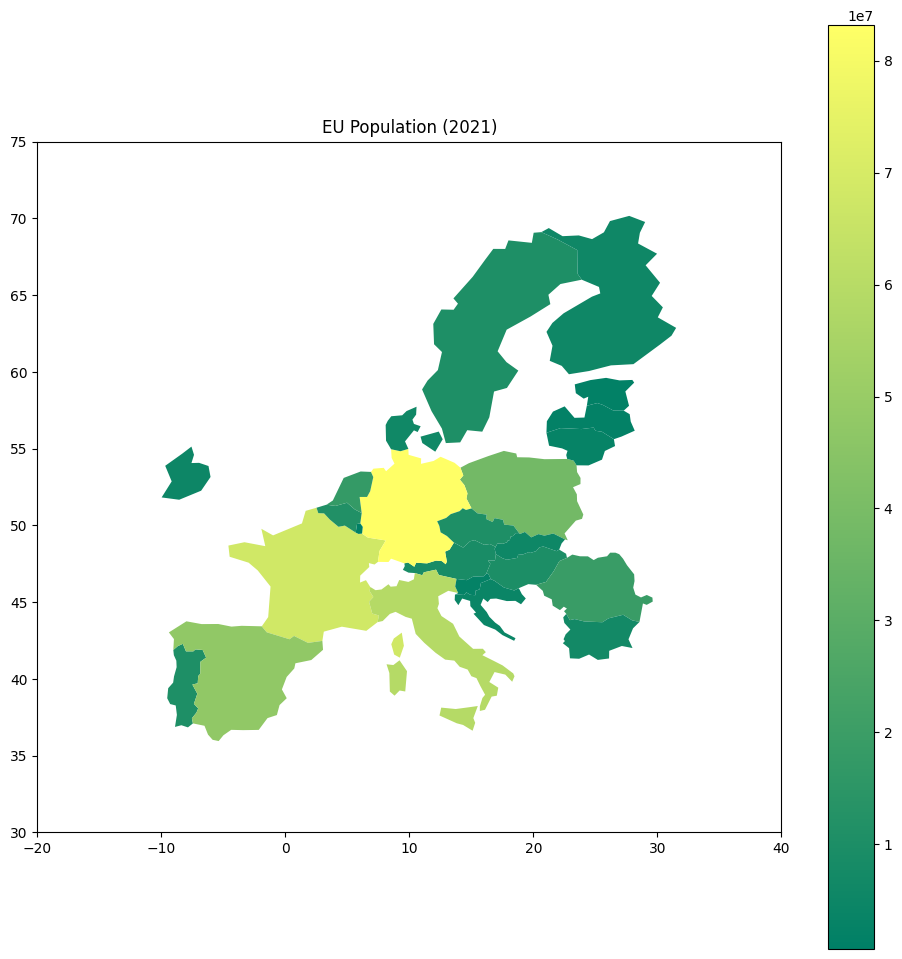

In [11]:
df_euro_2021.plot(column = "Population", cmap = "summer", legend=True, figsize=(12, 12));
plt.xlim(-20, 40);
plt.ylim(30, 75);
plt.title("EU Population (2021)");

In [12]:
# GDP per capita
df_euro_2021["GDP Per Capita"] = df_euro_2021["GDP"] / df_euro_2021["Population"]


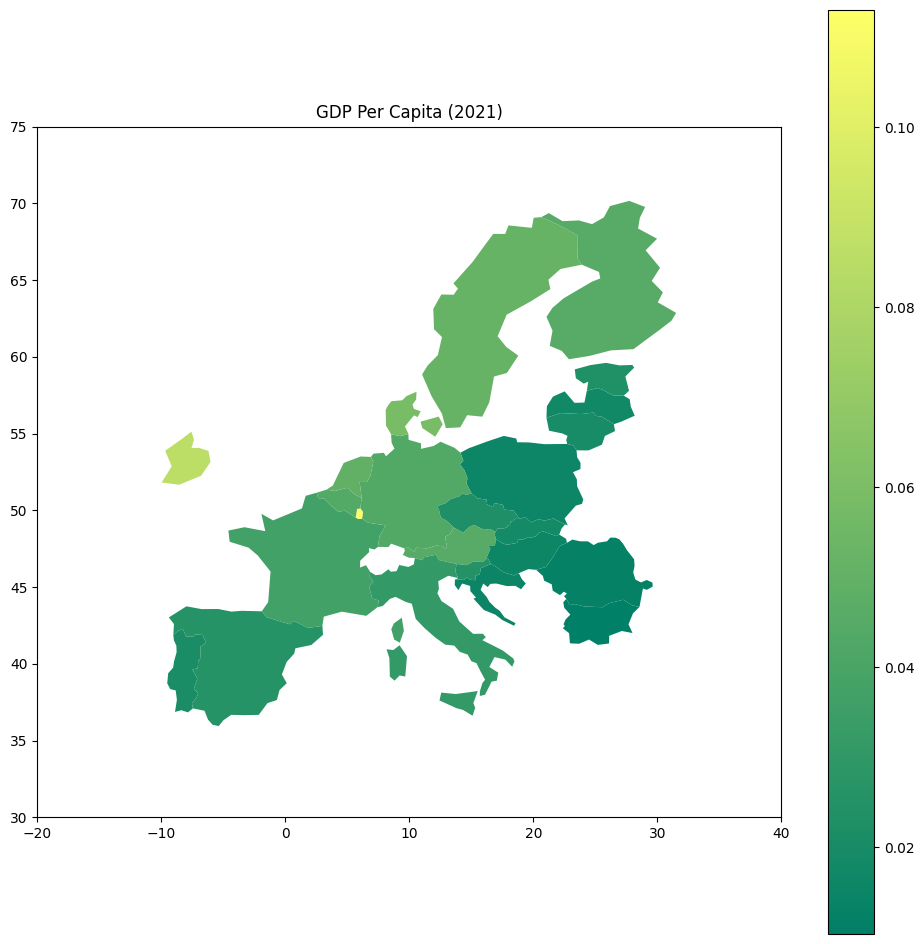

In [13]:
df_euro_2021.plot(column = "GDP Per Capita", cmap = "summer", legend=True, figsize=(12, 12));
plt.xlim(-20, 40);
plt.ylim(30, 75);
plt.title("GDP Per Capita (2021)");

# Features Over Time (Line Plots)

Below are visualizations for each feature over time.

Because each country's population varies, some values will be higher or lower just because their population is higher/lower. To counteract that, I plotted line plots for each feature as well as values per capita (for features directly influenced by population)

In [14]:
df_euro_data.rename(columns={'TIME_PERIOD': "Year"}, inplace=True)
df_euro_data

,geo,Year,CPI,Immigrants,Population,Housing Index,GDP,emigration,unemployment,total_deaths,Exports,Imports
0,Austria,2011,93.35,82230.0,8391643.0,81.60,310128.7,51197.0,3.3,76479.0,127462.4,137512.5
1,Austria,2012,95.75,91557.0,8429991.0,87.57,318653.0,51812.0,3.5,79436.0,129678.5,138942.4
2,Austria,2013,97.77,101866.0,8479823.0,92.10,323910.2,54071.0,3.8,79526.0,131884.6,137999.8
3,Austria,2014,99.20,116262.0,8546356.0,95.33,333146.1,53491.0,4.0,78252.0,134172.5,137001.2
4,Austria,2015,100.00,166323.0,8642699.0,100.00,344269.2,56689.0,4.1,83073.0,137756.8,140699.2
...,...,...,...,...,...,...,...,...,...,...,...,...
280,Slovakia,2017,100.90,7188.0,5439232.0,112.99,84669.9,3466.0,5.4,53914.0,73790.1,72191.9
281,Slovakia,2018,103.46,7253.0,5446771.0,121.32,89874.7,3298.0,4.3,54293.0,79136.9,78727.4
282,Slovakia,2019,106.33,7016.0,5454147.0,132.39,94429.7,3384.0,3.8,53234.0,79962.0,80407.4
283,Slovakia,2020,108.47,6775.0,5458827.0,145.06,93444.1,2428.0,4.4,59089.0,75586.2,73700.2


In [15]:
# Plotting per capita data
df_euro_data_pcap = df_euro_data.copy()
df_euro_data_pcap["Immigrants_pcap"] = df_euro_data_pcap["Immigrants"] / df_euro_data_pcap["Population"]
df_euro_data_pcap["GDP_pcap"] = df_euro_data_pcap["GDP"] / df_euro_data_pcap["Population"] * 1000000
df_euro_data_pcap["Emigrants_pcap"] = df_euro_data_pcap["emigration"] / df_euro_data_pcap["Population"]
df_euro_data_pcap["Deaths_pcap"] = df_euro_data_pcap["total_deaths"] / df_euro_data_pcap["Population"]
df_euro_data_pcap["Exports_pcap"] = df_euro_data_pcap["Exports"] / df_euro_data_pcap["Population"]
df_euro_data_pcap["Imports_pcap"] = df_euro_data_pcap["Imports"] / df_euro_data_pcap["Population"]
# Beware that all data is tiny b/c GDP is measured in million euro
# Multiplied GDP by 1000000 so we can measure in Euros (instead of million euros)

df_euro_data_pcap

,geo,Year,CPI,Immigrants,Population,Housing Index,GDP,emigration,unemployment,total_deaths,Exports,Imports,Immigrants_pcap,GDP_pcap,Emigrants_pcap,Deaths_pcap,Exports_pcap,Imports_pcap
0,Austria,2011,93.35,82230.0,8391643.0,81.60,310128.7,51197.0,3.3,76479.0,127462.4,137512.5,0.009799,36956.851000,0.006101,0.009114,0.015189,0.016387
1,Austria,2012,95.75,91557.0,8429991.0,87.57,318653.0,51812.0,3.5,79436.0,129678.5,138942.4,0.010861,37799.921732,0.006146,0.009423,0.015383,0.016482
2,Austria,2013,97.77,101866.0,8479823.0,92.10,323910.2,54071.0,3.8,79526.0,131884.6,137999.8,0.012013,38197.754835,0.006376,0.009378,0.015553,0.016274
3,Austria,2014,99.20,116262.0,8546356.0,95.33,333146.1,53491.0,4.0,78252.0,134172.5,137001.2,0.013604,38981.069827,0.006259,0.009156,0.015699,0.016030
4,Austria,2015,100.00,166323.0,8642699.0,100.00,344269.2,56689.0,4.1,83073.0,137756.8,140699.2,0.019244,39833.528855,0.006559,0.009612,0.015939,0.016280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,Slovakia,2017,100.90,7188.0,5439232.0,112.99,84669.9,3466.0,5.4,53914.0,73790.1,72191.9,0.001322,15566.517479,0.000637,0.009912,0.013566,0.013272
281,Slovakia,2018,103.46,7253.0,5446771.0,121.32,89874.7,3298.0,4.3,54293.0,79136.9,78727.4,0.001332,16500.546838,0.000605,0.009968,0.014529,0.014454
282,Slovakia,2019,106.33,7016.0,5454147.0,132.39,94429.7,3384.0,3.8,53234.0,79962.0,80407.4,0.001286,17313.376409,0.000620,0.009760,0.014661,0.014742
283,Slovakia,2020,108.47,6775.0,5458827.0,145.06,93444.1,2428.0,4.4,59089.0,75586.2,73700.2,0.001241,17117.981574,0.000445,0.010824,0.013847,0.013501


In [16]:
df_euro_data_pcap.to_csv('eurostat_pcap_no_nans.csv')

### CPI

In [17]:
px.line(df_euro_data, x="Year", y="CPI", color="geo", markers=True, title="CPI Over Time")

<Axes: title={'center': 'CPI Distribution'}, ylabel='Frequency'>

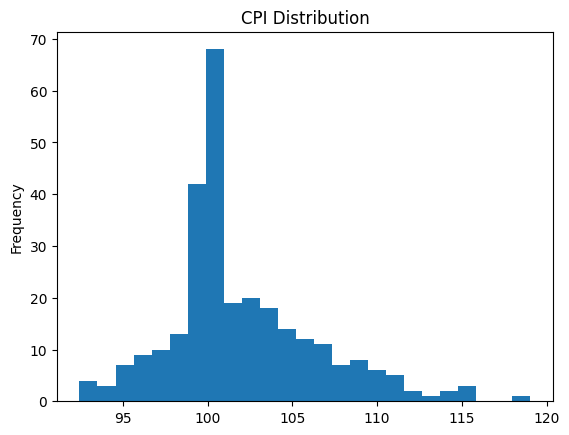

In [36]:
df_euro_data_pcap['CPI'].plot.hist(xlabel="CPI", title="CPI Distribution", bins=25)

### Immigration

In [18]:
px.line(df_euro_data, x="Year", y="Immigrants", color="geo", markers=True, title="Immigration Over Time",
        labels={"Immigrants": "Number of Immigrants"})

Germany spike in 2015 - Syrian immigration

<Axes: title={'center': 'Immigrants Distribution'}, ylabel='Frequency'>

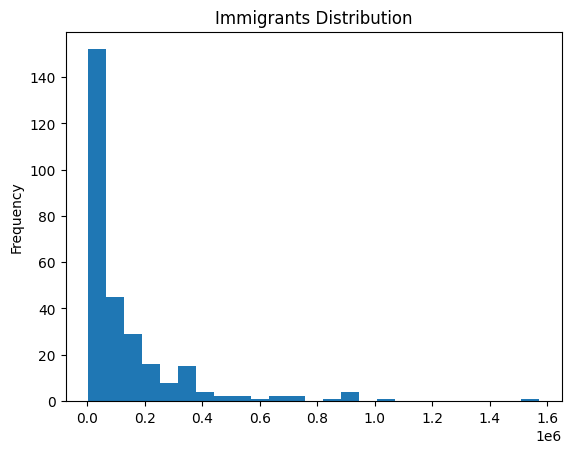

In [37]:
df_euro_data_pcap['Immigrants'].plot.hist(xlabel="Number of Immigrants", title="Immigrants Distribution", bins=25)

In [19]:
px.line(df_euro_data_pcap, x="Year", y="Immigrants_pcap", color="geo", markers=True, title="Immigration Per Capita Over Time",
        labels={"Immigrants_pcap": "Number of Immigrants Per Capita"})

### Population

In [20]:
px.line(df_euro_data, x="Year", y="Population", color="geo", markers=True, title="Population Over Time",
        labels={"Population": "Population (Number of People)"})

Population stays relatively steady

<Axes: title={'center': 'Population Distribution'}, ylabel='Frequency'>

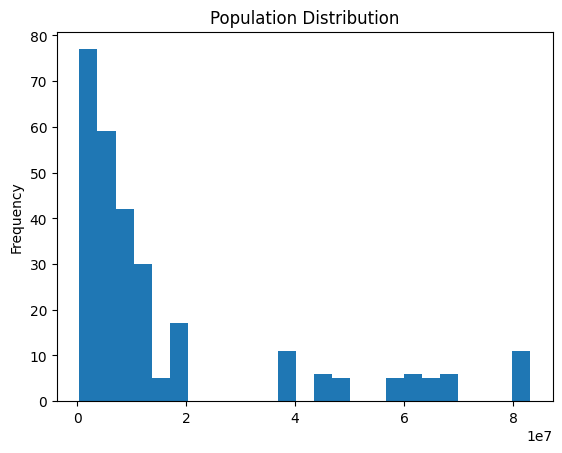

In [38]:
df_euro_data_pcap['Population'].plot.hist(xlabel="Population (Number of People)", title="Population Distribution", bins=25)

Large differences in population due to country size.

### Housing Index

In [21]:
px.line(df_euro_data, x="Year", y="Housing Index", color="geo", markers=True, title="Housing Price Index Over Time (2015 = 100)",
        labels={"Housing Index": "Housing Price Index (2015 = 100)"})

Hungary's doubled in 10 years!

<Axes: title={'center': 'Housing Price Index Distribution'}, ylabel='Frequency'>

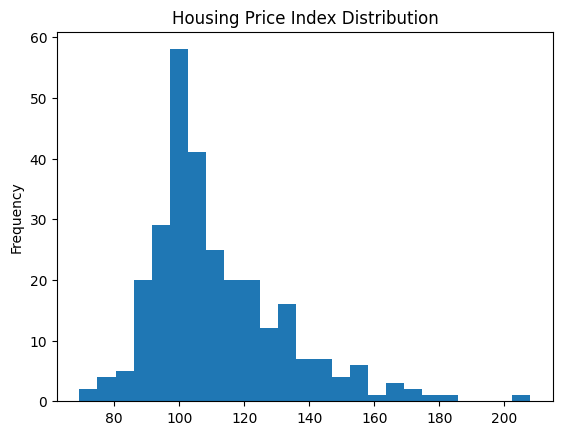

In [41]:
df_euro_data_pcap['Housing Index'].plot.hist(xlabel="Housing Index", title="Housing Price Index Distribution", bins=25)

## GDP

In [22]:
px.line(df_euro_data, x="Year", y="GDP", color="geo", markers=True, title="GDP Over Time",
        labels={"GDP": "GDP (million Euros)"})

<Axes: title={'center': 'GDP Distribution'}, ylabel='Frequency'>

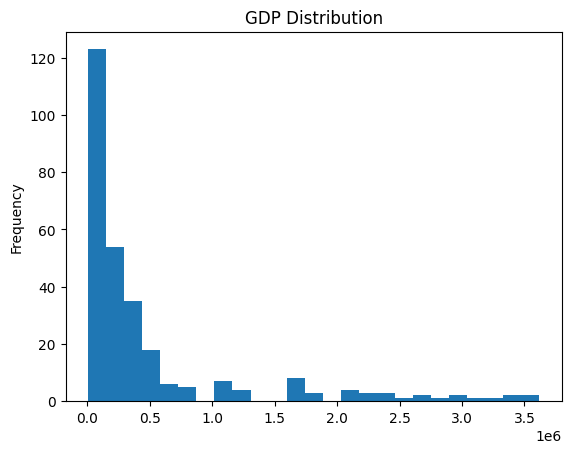

In [42]:
df_euro_data_pcap['GDP'].plot.hist(xlabel="GDP", title="GDP Distribution", bins=25)

Notice that in the per capita graph, the measurement is in Euros, not million Euros

In [23]:
px.line(df_euro_data_pcap, x="Year", y="GDP_pcap", color="geo", markers=True, title="GDP Per Capita Over Time",
        labels={"GDP_pcap": "GDP per Capita (Euros)"})

<Axes: title={'center': 'GDP Per Capita Distribution'}, ylabel='Frequency'>

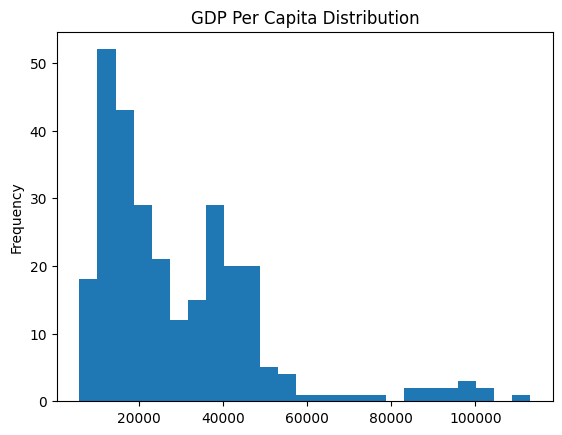

In [47]:
df_euro_data_pcap['GDP_pcap'].plot.hist(xlabel="GDP per Capita", title="GDP Per Capita Distribution", bins=25)

## Emigration

In [24]:
px.line(df_euro_data, x="Year", y="emigration", color="geo", markers=True, title="Emigration Over Time",
        labels={"emigration": "Number of Emigrants"})

Some countries have a lot of fluctuation while others are consistent, interesting...

<Axes: title={'center': 'Emigrant Distribution'}, ylabel='Frequency'>

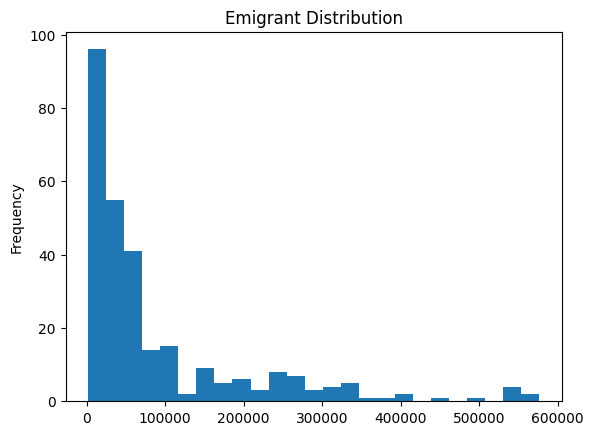

In [43]:
df_euro_data_pcap['emigration'].plot.hist(xlabel="Emigrants", title="Emigrant Distribution", bins=25)

In [25]:
px.line(df_euro_data_pcap, x="Year", y="Emigrants_pcap", color="geo", markers=True, title="Emigrants Per Capita Over Time",
        labels={"Emigrants_pcap": "Emigrants per Capita"})

<Axes: title={'center': 'Emigrants Per Capita Distribution'}, ylabel='Frequency'>

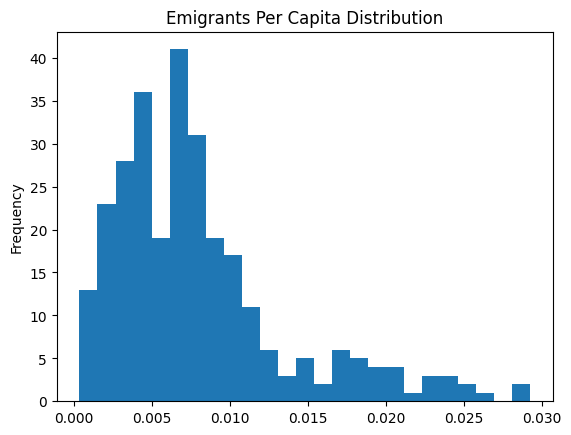

In [49]:
df_euro_data_pcap['Emigrants_pcap'].plot.hist(xlabel="Emigrants per Capita", title="Emigrants Per Capita Distribution", bins=25)

## Unemployment

In [26]:
px.line(df_euro_data, x="Year", y="unemployment", color="geo", markers=True, title="Unemployment Rate (Percentage) Over Time",
        labels={"unemployment": "Unemployment Rate"})

<Axes: title={'center': 'Unemployment Rate Distribution'}, ylabel='Frequency'>

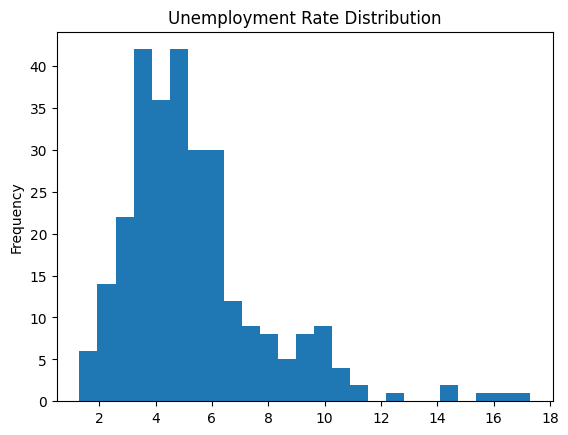

In [44]:
df_euro_data_pcap['unemployment'].plot.hist(xlabel="Unemployment Rate", title="Unemployment Rate Distribution", bins=25)

## Deaths

In [27]:
px.line(df_euro_data, x="Year", y="total_deaths", color="geo", markers=True, title="Deaths Over Time",
        labels={"total_deaths": "Number of Deaths"})

Included this feature because it was also in the population data set.

In [28]:
px.line(df_euro_data_pcap, x="Year", y="Deaths_pcap", color="geo", markers=True, title="Deaths Per Capita Over Time",
        labels={"Deaths_pcap": "Deaths per Capita"})

<Axes: title={'center': 'Deaths Per Capita Distribution'}, ylabel='Frequency'>

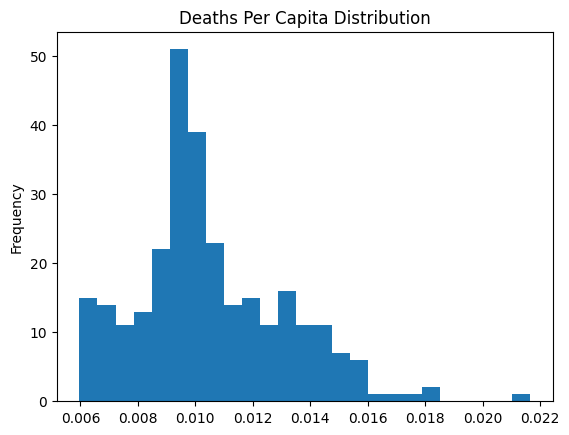

In [50]:
df_euro_data_pcap['Deaths_pcap'].plot.hist(xlabel="Deaths per Capita", title="Deaths Per Capita Distribution", bins=25)

## Exports

In [29]:
px.line(df_euro_data, x="Year", y="Exports", color="geo", markers=True, title="Exports Over Time",
        labels={"Exports": "Exports (in million Euros)"})

<Axes: title={'center': 'Exports Per Capita Distribution'}, ylabel='Frequency'>

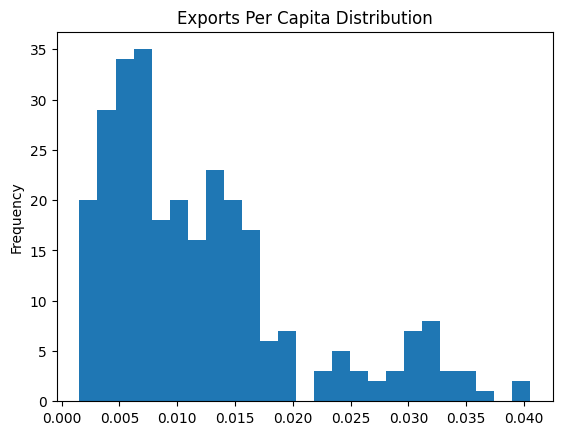

In [51]:
df_euro_data_pcap['Exports_pcap'].plot.hist(xlabel="Exports_pcap", title="Exports Per Capita Distribution", bins=25)

In [30]:
px.line(df_euro_data_pcap, x="Year", y="Exports_pcap", color="geo", markers=True, title="Exports Per Capita Over Time",
        labels={"Exports_pcap": "Exports (in million Euros) per capita"})

## Imports

In [31]:
px.line(df_euro_data, x="Year", y="Imports", color="geo", markers=True, title="Imports Over Time",
        labels={"Imports": "Imports (in million Euros)"})

<Axes: title={'center': 'Imports Distribution'}, ylabel='Frequency'>

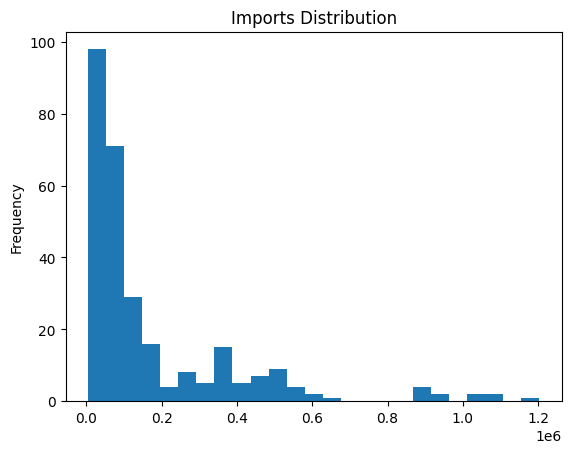

In [46]:
df_euro_data_pcap['Imports'].plot.hist(xlabel="Imports", title="Imports Distribution", bins=25)

In [32]:
px.line(df_euro_data_pcap, x="Year", y="Imports_pcap", color="geo", markers=True, title="Imports Per Capita Over Time",
        labels={"Imports_pcap": "Imports (in million Euros) per capita"})